In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# load the dataset

In [2]:
#Making test and the training set
x_train = pd.read_csv('train.csv')
y_train = x_train['label'].values
x_train = x_train.drop('label', axis = 1).values
test    = pd.read_csv('test.csv').values

In [3]:
#Feature Scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [4]:
#Now implementing the scalar over the x_train and x_test and transforming them to x_train_scaler and x_test_scaler
x_train_scaler = scaler.transform(x_train)
test_scaler = scaler.transform(test)

# Principal component analysis (PCA)

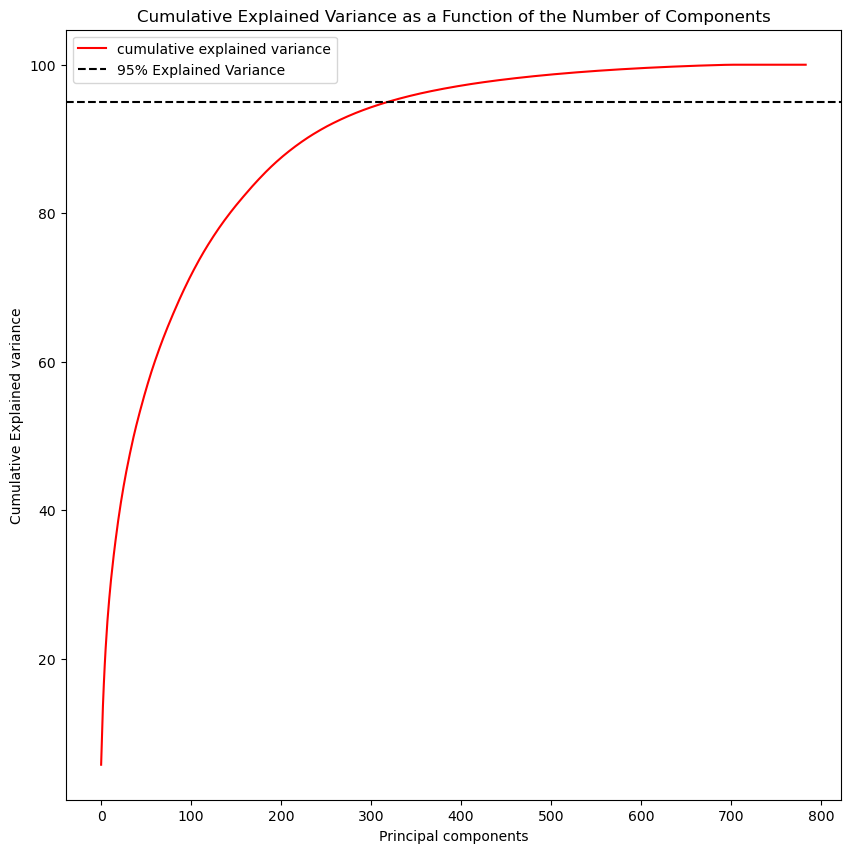

In [5]:
#Ploting the relation between the Variance and the Dimensions
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scaler)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [6]:
#Applying PCA and Transforming x_train_scaler and x_test_scaler to x_train_pca and x_test_pca
from sklearn.decomposition import PCA
pca = PCA(.95) 
pca.fit(x_train_scaler)

x_train_pca = pca.transform(x_train_scaler)
test_pca        = pca.transform(test_scaler)

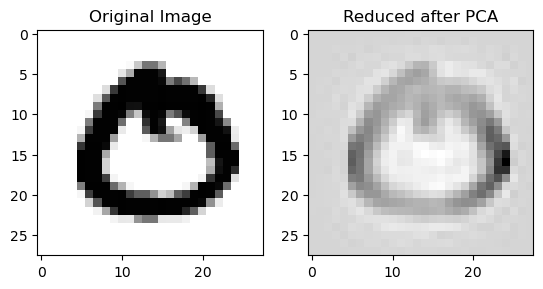

In [7]:
#Comparing the images before and after applying the PCA
sample = x_train[23]
sample.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(sample, cmap = plt.cm.gray_r)

sample = pca.inverse_transform(x_train_pca[23])
sample.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(sample, cmap = plt.cm.gray_r)

# Applying the Logistic Regression model

In [8]:
#GridSearch Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# making skeletal model
logistic_regression = LogisticRegression(n_jobs = -1)

# Set of parameters we want to try for out Model
parameters = { 'C' : [1.1,1.25,1.5]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = logistic_regression, param_grid = parameters , scoring = 'accuracy', cv = 3, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(x_train_pca , y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [9]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.9179761904761906
{'C': 1.1}


In [10]:
# Making the Final Classification model.
logistic_regression = LogisticRegression( C = 1.25, n_jobs = -1)
tick =datetime.datetime.now()
logistic_regression.fit(x_train_pca, y_train)
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training a Logistic Regression model = " + str(lr_train_time))

Time taken for training a Logistic Regression model = 0:00:09.138104


# Predicting values on training set

In [11]:
tick=datetime.datetime.now()
lr_train_predict=logistic_regression.predict(x_train_pca)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

Time taken to predict the data points in the Test set is : 0:00:00.092457


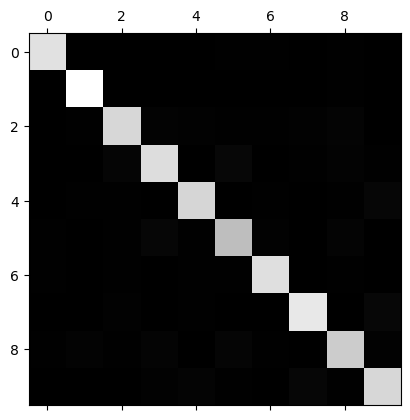

In [12]:
#Making the confusion Matrix

from sklearn.metrics import confusion_matrix
cf= confusion_matrix(y_train, lr_train_predict)

# Visualizing the Confusion Matrix`

plt.matshow(cf , cmap = plt.cm.gray, )
plt.show()


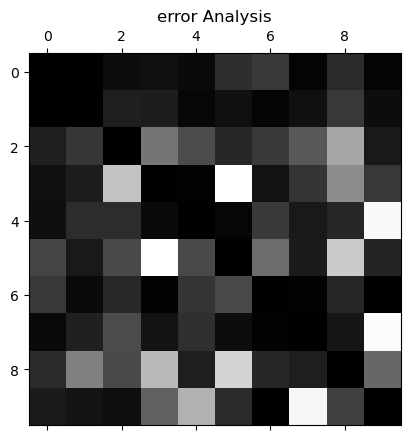

In [13]:
# Analyzing the Errors
row_sums = cf.sum(axis=1 , keepdims = True)
normal_cf = cf/row_sums

np.fill_diagonal(normal_cf,0)
plt.matshow(normal_cf,cmap = plt.cm.gray)

plt.title("error Analysis")
plt.show()

In [14]:
#Accuracy on Training Set
k = logistic_regression.score(x_train_pca, y_train)
print('the Accuracy on the Training set come out to be : ' + str(k))

the Accuracy on the Training set come out to be : 0.9384047619047619


In [15]:
import sklearn.metrics as skm
print(skm.classification_report( y_train , lr_train_predict ))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4132
           1       0.97      0.98      0.97      4684
           2       0.93      0.92      0.93      4177
           3       0.92      0.91      0.92      4351
           4       0.94      0.94      0.94      4072
           5       0.91      0.90      0.90      3795
           6       0.96      0.97      0.96      4137
           7       0.95      0.95      0.95      4401
           8       0.91      0.90      0.91      4063
           9       0.92      0.92      0.92      4188

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000



In [16]:
#Running model on the test set
predict = logistic_regression.predict(test_pca)
print(predict)

[2 0 9 ... 3 9 2]
